<h1><center> DATA ANALYSIS OF COURSERA COURSES</center></h1>

<h2><center>Emmanuel Acheampong</center></h2>


<img src="1.png">

![Alwayslearning](1.gif)

After completing multiple online courses on Coursera, I wanted to get some insights into what type of courses I was taking, how well I was performing to measure how much I was getting done and how to become more efficient in my exploration of learning. This is the background of this project to learn more about my online learning habits.

<h1><center> Data Preparation</center></h1>

# Scraping Online Coursera Data  

In order to acquire the data from my Coursera profile, I used the Web Scrapper plugin in Google Chrome. This plugin allowed me to utilize the Divs, parent and child nodes, in HTML to get the data that I needed including the Course Name, Course Grade, Institution that taught the course, the Issue date, and even the Credential ID to confirm the certificate

<img src="3.png">

<img src="2.png">

<h1><center> Data Analysis</center></h1>

In [177]:
# Import all necessary modules

import csv
import pandas as pd
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio
import numpy as np
import os
import plotly.plotly as py


%matplotlib inline 

In [178]:
#import and read csv file
df = pd.read_csv('coursera.csv')

In [179]:
#Get a glimpse of what the data looks like
df.head()

,Course Name,Course Grade,Institution,Issue Date,Credential,Website,Issuing Organization
0,Developing and Deploying Microservices with Mi...,Grade Achieved: 83.6%,IBM,Feb-19,RPXDTZQ84XK4,https://www.coursera.org/account/accomplishmen...,Coursera
1,Networking in GCP: Hybrid Connectivity and Net...,Grade Achieved: 98.5%,Google Cloud,Jan-19,MNNKX588FPUS,https://www.coursera.org/account/accomplishmen...,Coursera
2,"App Deployment, Debugging, and Performance",Grade Achieved: 78.0%,Google Cloud,Jan-19,BY8BXQ675UHC,https://www.coursera.org/account/accomplishmen...,Coursera
3,Securing and Integrating Components of your Ap...,Grade Achieved: 83.3%,Google Cloud,Jan-19,MQ49SHZWPVSE,https://www.coursera.org/account/accomplishmen...,Coursera
4,Getting Started With Application Development,Grade Achieved: 76.7%,Google Cloud,Jan-19,QP4DBY5WEGAB,https://www.coursera.org/account/accomplishmen...,Coursera


In [4]:
# Check the total number of courses taken.
df['Course Name'].count()

73

## There are 73 courses in this data set ranging from a wide variety of fields such as Data Science, Machine Learning to Finance and Leadership

# Group dataset by Institutions both Companies and colleges.

In [180]:
# Group the dataset by the institution
df3b = df.groupby(['Institution']).count()

In [181]:
df3b

,Course Name,Course Grade,Issue Date,Credential,Website,Issuing Organization
Institution,,,,,,
Amazon Web Services,1,1,1,1,1,1
Google,6,6,6,6,6,6
Google AR & VR,1,1,1,1,1,1
Google Cloud,22,22,22,22,22,22
HEC Paris,1,1,1,1,1,1
IBM,13,13,13,13,13,13
Imperial College London,3,3,3,3,3,3
New York University Tandon School of Engineering,1,1,1,1,1,1
PwC,2,2,2,2,2,2


## The institutions in the dataset are diverse and represent various parts of the world.

##  The institution I have taken the most courses with is Google, 22 with Google Cloud, 6 with Google and 1 with Google AR/VR totaling 29 courses of Google

![Google](2.gif)

In [223]:
print((29/73)*100)

39.726027397260275


### That is about 39% of the total courses taken

In [ ]:
1

## The institution I have taken the second most courses with is IBM with 13 courses.

![IBM](4.gif)

In [224]:
print((13/73)*100)

17.80821917808219


### That is about 17% of the total courses take

## DeepLearning.ai and University of Pennsylvania follow with 7 and 6 courses respectively.

<img src="4.png">
<img src="5.jpg">

### 17% of the courses completed were taught by UPenn or deeplearning.ai

# Group dataset by Date Certificate was Issued.

In [182]:
# Group the dataset by the Date Issued
df3a = df.groupby(['Issue Date']).count()

In [183]:
df3a

,Course Name,Course Grade,Institution,Credential,Website,Issuing Organization
Issue Date,,,,,,
Apr-18,1,1,1,1,1,1
Apr-19,1,1,1,1,1,1
Aug-18,8,8,8,8,8,8
Dec-18,9,9,9,9,9,9
Feb-18,5,5,5,5,5,5
Feb-19,6,6,6,6,6,6
Jan-18,1,1,1,1,1,1
Jan-19,5,5,5,5,5,5
Jul-18,6,6,6,6,6,6


# Data Cleansing

Fortunately due to using the Chrome plugin, the data that was collected was relevant. However, there had to be a little string manipulation. Some characters had to be removed and a column of strings had to be converted to integers.


In [184]:
#Remove some elements of strings in the Course Grade column
df['Course Grade'] =df['Course Grade'].str.replace('Grade Achieved: ', '', regex=True)

In [185]:

df['Course Grade'] =df['Course Grade'].str.replace('%', '', regex=True)

In [186]:
# Check out the data so far
df

,Course Name,Course Grade,Institution,Issue Date,Credential,Website,Issuing Organization
0,Developing and Deploying Microservices with Mi...,83.6,IBM,Feb-19,RPXDTZQ84XK4,https://www.coursera.org/account/accomplishmen...,Coursera
1,Networking in GCP: Hybrid Connectivity and Net...,98.5,Google Cloud,Jan-19,MNNKX588FPUS,https://www.coursera.org/account/accomplishmen...,Coursera
2,"App Deployment, Debugging, and Performance",78.0,Google Cloud,Jan-19,BY8BXQ675UHC,https://www.coursera.org/account/accomplishmen...,Coursera
3,Securing and Integrating Components of your Ap...,83.3,Google Cloud,Jan-19,MQ49SHZWPVSE,https://www.coursera.org/account/accomplishmen...,Coursera
4,Getting Started With Application Development,76.7,Google Cloud,Jan-19,QP4DBY5WEGAB,https://www.coursera.org/account/accomplishmen...,Coursera
5,Problem Solving with Excel,98.7,PwC,Jan-19,M5YKF4Z76ACL,https://www.coursera.org/account/accomplishmen...,Coursera
6,Introduction to Cyber Attacks,86.0,New York University Tandon School of Engineering,Dec-18,DAZTCCGMGUYP,https://www.coursera.org/account/accomplishmen...,Coursera
7,End-to-End Machine Learning with TensorFlow on...,83.5,Google Cloud,Dec-18,VX6SL8QT4S2G,https://www.coursera.org/account/accomplishmen...,Coursera
8,Data Analysis with Python,93.4,IBM,Dec-18,B3PLHQEH3L8W,https://www.coursera.org/account/accomplishmen...,Coursera
9,Reliable Cloud Infrastructure: Design and Process,88.3,Google Cloud,Dec-18,PK2BVANGDHQU,https://www.coursera.org/account/accomplishmen...,Coursera


In [187]:
# Convert values in the Course Grade column from strings into numbers.
import numpy as np
df['Course Grade'] = pd.to_numeric(df['Course Grade'] , errors='coerce').fillna(0).astype(np.int64)

In [188]:
# Check out the data.
df

,Course Name,Course Grade,Institution,Issue Date,Credential,Website,Issuing Organization
0,Developing and Deploying Microservices with Mi...,83,IBM,Feb-19,RPXDTZQ84XK4,https://www.coursera.org/account/accomplishmen...,Coursera
1,Networking in GCP: Hybrid Connectivity and Net...,98,Google Cloud,Jan-19,MNNKX588FPUS,https://www.coursera.org/account/accomplishmen...,Coursera
2,"App Deployment, Debugging, and Performance",78,Google Cloud,Jan-19,BY8BXQ675UHC,https://www.coursera.org/account/accomplishmen...,Coursera
3,Securing and Integrating Components of your Ap...,83,Google Cloud,Jan-19,MQ49SHZWPVSE,https://www.coursera.org/account/accomplishmen...,Coursera
4,Getting Started With Application Development,76,Google Cloud,Jan-19,QP4DBY5WEGAB,https://www.coursera.org/account/accomplishmen...,Coursera
5,Problem Solving with Excel,98,PwC,Jan-19,M5YKF4Z76ACL,https://www.coursera.org/account/accomplishmen...,Coursera
6,Introduction to Cyber Attacks,86,New York University Tandon School of Engineering,Dec-18,DAZTCCGMGUYP,https://www.coursera.org/account/accomplishmen...,Coursera
7,End-to-End Machine Learning with TensorFlow on...,83,Google Cloud,Dec-18,VX6SL8QT4S2G,https://www.coursera.org/account/accomplishmen...,Coursera
8,Data Analysis with Python,93,IBM,Dec-18,B3PLHQEH3L8W,https://www.coursera.org/account/accomplishmen...,Coursera
9,Reliable Cloud Infrastructure: Design and Process,88,Google Cloud,Dec-18,PK2BVANGDHQU,https://www.coursera.org/account/accomplishmen...,Coursera


In [189]:
## Check the average of the scores received from the certifications

In [190]:
df['Course Grade'].mean(skipna = True) 

89.76712328767124

# The Average grade received for the courses is 89.767

In [191]:
# Sort out the data set according to the course grade
df.sort_values(by=['Course Grade'], ascending=False)

,Course Name,Course Grade,Institution,Issue Date,Credential,Website,Issuing Organization
40,Elastic Cloud Infrastructure: Containers and S...,100,Google Cloud,Dec-18,AFD67UTMREQB,https://www.coursera.org/account/accomplishmen...,Coursera
68,Leveraging Unstructured Data with Cloud Datapr...,100,Google Cloud,Jun-18,6XZPMT3P2XQE,https://www.coursera.org/account/accomplishmen...,Coursera
67,Serverless Data Analysis with Google BigQuery ...,100,Google Cloud,Jun-18,QH8PBKHK2GHT,https://www.coursera.org/account/accomplishmen...,Coursera
46,Google Cloud Platform Big Data and Machine Lea...,100,Google Cloud,May-18,44FYT88G2QM2,https://www.coursera.org/account/accomplishmen...,Coursera
1,Networking in GCP: Hybrid Connectivity and Net...,98,Google Cloud,Jan-19,MNNKX588FPUS,https://www.coursera.org/account/accomplishmen...,Coursera
5,Problem Solving with Excel,98,PwC,Jan-19,M5YKF4Z76ACL,https://www.coursera.org/account/accomplishmen...,Coursera
60,Mathematics for Machine Learning: Linear Algebra,98,Imperial College London,Jul-18,R4XRHLPY9E5G,https://www.coursera.org/account/accomplishmen...,Coursera
14,Technical Support Fundamentals,98,Google,Jan-18,DAXKK72Z7X6T,https://www.coursera.org/account/accomplishmen...,Coursera
53,Microservices - Fundamentals,97,IBM,Sep-18,6Z95JT3ZMQFX,https://www.coursera.org/account/accomplishmen...,Coursera
69,IT Automation: It’s not that scary!,97,Google,Feb-18,EYCHFBGKV9UF,https://www.coursera.org/account/accomplishmen...,Coursera


In [192]:
df.dtypes

Course Name             object
Course Grade             int64
Institution             object
Issue Date              object
Credential              object
Website                 object
Issuing Organization    object
dtype: object

In [195]:
df[df['Course Grade'] >= 90].count()


Course Name             38
Course Grade            38
Institution             38
Issue Date              38
Credential              38
Website                 38
Issuing Organization    38
dtype: int64

# The number of courses with a grade of 90% or higher is 38

In [196]:
print((38/73)*100)

52.054794520547944


# That is 52% of the total number of courses taken

In [197]:
df[df['Course Grade'] >= 80].count()


Course Name             70
Course Grade            70
Institution             70
Issue Date              70
Credential              70
Website                 70
Issuing Organization    70
dtype: int64

# The number of courses with a grade 80% > higher is 70

In [198]:
print((70/73)*100)

95.8904109589041


# That is 95% of the total number of courses taken

In [25]:
df2 = df.sort_values(by=['Course Grade'], ascending=False)

In [38]:
df2

,Course Name,Course Grade,Institution,Issue Date,Credential,Website,Issuing Organization
40,Elastic Cloud Infrastructure: Containers and S...,100,Google Cloud,Dec-18,AFD67UTMREQB,https://www.coursera.org/account/accomplishmen...,Coursera
68,Leveraging Unstructured Data with Cloud Datapr...,100,Google Cloud,Jun-18,6XZPMT3P2XQE,https://www.coursera.org/account/accomplishmen...,Coursera
67,Serverless Data Analysis with Google BigQuery ...,100,Google Cloud,Jun-18,QH8PBKHK2GHT,https://www.coursera.org/account/accomplishmen...,Coursera
46,Google Cloud Platform Big Data and Machine Lea...,100,Google Cloud,May-18,44FYT88G2QM2,https://www.coursera.org/account/accomplishmen...,Coursera
1,Networking in GCP: Hybrid Connectivity and Net...,98,Google Cloud,Jan-19,MNNKX588FPUS,https://www.coursera.org/account/accomplishmen...,Coursera
5,Problem Solving with Excel,98,PwC,Jan-19,M5YKF4Z76ACL,https://www.coursera.org/account/accomplishmen...,Coursera
60,Mathematics for Machine Learning: Linear Algebra,98,Imperial College London,Jul-18,R4XRHLPY9E5G,https://www.coursera.org/account/accomplishmen...,Coursera
14,Technical Support Fundamentals,98,Google,Jan-18,DAXKK72Z7X6T,https://www.coursera.org/account/accomplishmen...,Coursera
53,Microservices - Fundamentals,97,IBM,Sep-18,6Z95JT3ZMQFX,https://www.coursera.org/account/accomplishmen...,Coursera
69,IT Automation: It’s not that scary!,97,Google,Feb-18,EYCHFBGKV9UF,https://www.coursera.org/account/accomplishmen...,Coursera


In [37]:
df2.iloc[0]

Course Name             Elastic Cloud Infrastructure: Containers and S...
Course Grade                                                          100
Institution                                                  Google Cloud
Issue Date                                                         Dec-18
Credential                                                   AFD67UTMREQB
Website                 https://www.coursera.org/account/accomplishmen...
Issuing Organization                                             Coursera
Name: 40, dtype: object

# The highest score received for a course is 100%

In [199]:
df[df['Course Grade'] == 100].count()


Course Name             4
Course Grade            4
Institution             4
Issue Date              4
Credential              4
Website                 4
Issuing Organization    4
dtype: int64

# The number of courses with a perfect score received is 4

In [201]:
print((4/73)*100)

5.47945205479452


# That is ~5% of the total number of courses taken

In [28]:
df2.iloc[-1]

Course Name             Elastic Cloud Infrastructure: Scaling and Auto...
Course Grade                                                           74
Institution                                                  Google Cloud
Issue Date                                                         Dec-18
Credential                                                   5MYTGR2XRBG8
Website                 https://www.coursera.org/account/accomplishmen...
Issuing Organization                                             Coursera
Name: 41, dtype: object

# The least grade scored on a course is 74%

In [200]:
df[df['Course Grade'] == 74].count()

Course Name             1
Course Grade            1
Institution             1
Issue Date              1
Credential              1
Website                 1
Issuing Organization    1
dtype: int64

In [41]:
df3 = df.sort_values(by=['Course Name'], ascending=True)

In [42]:
df3

,Course Name,Course Grade,Institution,Issue Date,Credential,Website,Issuing Organization
33,AI For Everyone,90,deeplearning.ai,Mar-19,5ZC7F3CJG2Y3,https://www.coursera.org/account/accomplishmen...,Coursera
39,AWS Fundamentals: Going Cloud-Native,95,Amazon Web Services,Feb-19,TUACJRUWUZBQ,https://www.coursera.org/account/accomplishmen...,Coursera
32,Agile Meets Design Thinking,83,University of Virginia,Mar-19,7QTMGS8PXASQ,https://www.coursera.org/account/accomplishmen...,Coursera
2,"App Deployment, Debugging, and Performance",78,Google Cloud,Jan-19,BY8BXQ675UHC,https://www.coursera.org/account/accomplishmen...,Coursera
34,Applied Data Science Capstone,96,IBM,Mar-19,P9YZ6ZNHHV8Z,https://www.coursera.org/account/accomplishmen...,Coursera
56,Art and Science of Machine Learning,89,Google Cloud,Sep-18,YDBWE69CSV5W,https://www.coursera.org/account/accomplishmen...,Coursera
31,Big Data Emerging Technologies,88,Yonsei University,Mar-19,72EGWFT6N4M5,https://www.coursera.org/account/accomplishmen...,Coursera
64,Building Resilient Streaming Systems on Google...,83,Google Cloud,Jun-18,CR4MJRZLNTY2,https://www.coursera.org/account/accomplishmen...,Coursera
20,Building Your Leadership Skills,92,HEC Paris,Aug-18,P4HUHSFA2FEB,https://www.coursera.org/account/accomplishmen...,Coursera
17,Convolutional Neural Networks,94,deeplearning.ai,Sep-18,2Y59PH7MQBYV,https://www.coursera.org/account/accomplishmen...,Coursera


In [43]:
# Find out the courses with the word Data in their title
df_learn = df[df['Course Name'].str.contains("Data")==True]

In [44]:
df_learn

,Course Name,Course Grade,Institution,Issue Date,Credential,Website,Issuing Organization
8,Data Analysis with Python,93,IBM,Dec-18,B3PLHQEH3L8W,https://www.coursera.org/account/accomplishmen...,Coursera
16,Python for Data Science,93,IBM,Sep-18,HSDFU7H8GJAB,https://www.coursera.org/account/accomplishmen...,Coursera
19,Data Science Methodology,88,IBM,Sep-18,R4VZ74XJWPPW,https://www.coursera.org/account/accomplishmen...,Coursera
31,Big Data Emerging Technologies,88,Yonsei University,Mar-19,72EGWFT6N4M5,https://www.coursera.org/account/accomplishmen...,Coursera
34,Applied Data Science Capstone,96,IBM,Mar-19,P9YZ6ZNHHV8Z,https://www.coursera.org/account/accomplishmen...,Coursera
36,Data Visualization with Python,95,IBM,Feb-19,EG8FPRSYH82P,https://www.coursera.org/account/accomplishmen...,Coursera
37,Databases and SQL for Data Science,97,IBM,Feb-19,ZEEQ7M5HD5PK,https://www.coursera.org/account/accomplishmen...,Coursera
38,Open Source tools for Data Science,94,IBM,Feb-19,S5BN4HX33FBK,https://www.coursera.org/account/accomplishmen...,Coursera
46,Google Cloud Platform Big Data and Machine Lea...,100,Google Cloud,May-18,44FYT88G2QM2,https://www.coursera.org/account/accomplishmen...,Coursera
50,What is Data Science?,89,IBM,Sep-18,8AQE9V9K5SZR,https://www.coursera.org/account/accomplishmen...,Coursera


In [45]:
df_learn.count()

Course Name             14
Course Grade            14
Institution             14
Issue Date              14
Credential              14
Website                 14
Issuing Organization    14
dtype: int64

# 14 of the completed courses have data in their title.

In [203]:
print((14/73)*100)

19.17808219178082


# That is ~19% of the courses taken

In [211]:
df_learn2 = df[df['Course Name'].str.contains("Machine Learning")==True]

In [212]:
df_learn2

,Course Name,Course Grade,Institution,Issue Date,Credential,Website,Issuing Organization
7,End-to-End Machine Learning with TensorFlow on...,83,Google Cloud,Dec-18,VX6SL8QT4S2G,https://www.coursera.org/account/accomplishmen...,Coursera
24,Mathematics for Machine Learning: PCA,97,Imperial College London,Aug-18,MTA84QGJNGDH,https://www.coursera.org/account/accomplishmen...,Coursera
25,Mathematics for Machine Learning: Multivariate...,93,Imperial College London,Aug-18,LRDXF9AMQA3D,https://www.coursera.org/account/accomplishmen...,Coursera
26,Launching into Machine Learning,80,Google Cloud,Jul-18,996HZ54QMZTA,https://www.coursera.org/account/accomplishmen...,Coursera
30,Introduction to TensorFlow for Artificial Inte...,92,deeplearning.ai,Apr-19,ND9ZH79UEFQL,https://www.coursera.org/account/accomplishmen...,Coursera
35,Machine Learning with Python,92,IBM,Feb-19,6WH9WRGWJFML,https://www.coursera.org/account/accomplishmen...,Coursera
46,Google Cloud Platform Big Data and Machine Lea...,100,Google Cloud,May-18,44FYT88G2QM2,https://www.coursera.org/account/accomplishmen...,Coursera
55,Structuring Machine Learning Projects,90,deeplearning.ai,Sep-18,RGKVGZCWQ5NJ,https://www.coursera.org/account/accomplishmen...,Coursera
56,Art and Science of Machine Learning,89,Google Cloud,Sep-18,YDBWE69CSV5W,https://www.coursera.org/account/accomplishmen...,Coursera
60,Mathematics for Machine Learning: Linear Algebra,98,Imperial College London,Jul-18,R4XRHLPY9E5G,https://www.coursera.org/account/accomplishmen...,Coursera


In [213]:
df_learn2.count()

Course Name             12
Course Grade            12
Institution             12
Issue Date              12
Credential              12
Website                 12
Issuing Organization    12
dtype: int64

# 12 of the completed courses have machine learning in their title.

In [214]:
print((12/73)*100)

16.43835616438356


# That is ~16% of the courses taken

# In total 12+14+2 = 28. 28 Courses either contain data, Machine Learning, AI or Deep Learning

In [218]:
print((28/73)*100)

38.35616438356164


# That is ~38% of the courses taken.

In [49]:
df_learn3 = df[df['Course Name'].str.contains("Google")==True]

In [50]:
df_learn3

,Course Name,Course Grade,Institution,Issue Date,Credential,Website,Issuing Organization
43,Google Cloud Platform Fundamentals: Core Infra...,84,Google Cloud,Aug-18,JQGEWW3GQVBG,https://www.coursera.org/account/accomplishmen...,Coursera
46,Google Cloud Platform Big Data and Machine Lea...,100,Google Cloud,May-18,44FYT88G2QM2,https://www.coursera.org/account/accomplishmen...,Coursera
63,How Google does Machine Learning,83,Google Cloud,Jun-18,5QDKZ3UHXYSK,https://www.coursera.org/account/accomplishmen...,Coursera
64,Building Resilient Streaming Systems on Google...,83,Google Cloud,Jun-18,CR4MJRZLNTY2,https://www.coursera.org/account/accomplishmen...,Coursera
65,Serverless Machine Learning with Tensorflow on...,85,Google Cloud,Jun-18,FLQ6YCPNCQGK,https://www.coursera.org/account/accomplishmen...,Coursera
67,Serverless Data Analysis with Google BigQuery ...,100,Google Cloud,Jun-18,QH8PBKHK2GHT,https://www.coursera.org/account/accomplishmen...,Coursera
68,Leveraging Unstructured Data with Cloud Datapr...,100,Google Cloud,Jun-18,6XZPMT3P2XQE,https://www.coursera.org/account/accomplishmen...,Coursera


In [51]:
df_learn3.count()

Course Name             7
Course Grade            7
Institution             7
Issue Date              7
Credential              7
Website                 7
Issuing Organization    7
dtype: int64

# 7 Courses contain the word Google

In [219]:
print((7/73)*100)

9.58904109589041


# That's about 9% of the completed courses.

In [55]:
df_learn4 = df[df['Course Name'].str.contains("AI")==True]

In [53]:
df_learn4

,Course Name,Course Grade,Institution,Issue Date,Credential,Website,Issuing Organization
33,AI For Everyone,90,deeplearning.ai,Mar-19,5ZC7F3CJG2Y3,https://www.coursera.org/account/accomplishmen...,Coursera


In [60]:
df_learn5 = df[df['Course Name'].str.contains("Management")==True]

In [61]:
df_learn51

,Course Name,Course Grade,Institution,Issue Date,Credential,Website,Issuing Organization
1,Networking in GCP: Hybrid Connectivity and Net...,98,Google Cloud,Jan-19,MNNKX588FPUS,https://www.coursera.org/account/accomplishmen...,Coursera
11,Introduction to Operations Management,86,University of Pennsylvania,Nov-18,TPFTVAV33GAU,https://www.coursera.org/account/accomplishmen...,Coursera
27,Introduction to Software Product Management,80,University of Alberta,Jul-18,HHNWNXLFT38L,https://www.coursera.org/account/accomplishmen...,Coursera
61,Digital Product Management: Modern Fundamentals,82,University of Virginia,Jul-18,ZLTAZW5LYAJZ,https://www.coursera.org/account/accomplishmen...,Coursera


In [62]:
df_learn5.count()

Course Name             4
Course Grade            4
Institution             4
Issue Date              4
Credential              4
Website                 4
Issuing Organization    4
dtype: int64

# 4 courses contain the word Management

In [220]:
print((4/73)*100)

5.47945205479452


# That's ~5% of the completed courses

In [226]:
df[df['Course Name'].str.contains("Cloud")==True]

,Course Name,Course Grade,Institution,Issue Date,Credential,Website,Issuing Organization
9,Reliable Cloud Infrastructure: Design and Process,88,Google Cloud,Dec-18,PK2BVANGDHQU,https://www.coursera.org/account/accomplishmen...,Coursera
39,AWS Fundamentals: Going Cloud-Native,95,Amazon Web Services,Feb-19,TUACJRUWUZBQ,https://www.coursera.org/account/accomplishmen...,Coursera
40,Elastic Cloud Infrastructure: Containers and S...,100,Google Cloud,Dec-18,AFD67UTMREQB,https://www.coursera.org/account/accomplishmen...,Coursera
41,Elastic Cloud Infrastructure: Scaling and Auto...,74,Google Cloud,Dec-18,5MYTGR2XRBG8,https://www.coursera.org/account/accomplishmen...,Coursera
42,Essential Cloud Infrastructure: Core Services,83,Google Cloud,Dec-18,525FCZYYQ8BD,https://www.coursera.org/account/accomplishmen...,Coursera
43,Google Cloud Platform Fundamentals: Core Infra...,84,Google Cloud,Aug-18,JQGEWW3GQVBG,https://www.coursera.org/account/accomplishmen...,Coursera
44,Essential Cloud Infrastructure: Foundation,91,Google Cloud,Dec-18,ZRM2SA9QC5EW,https://www.coursera.org/account/accomplishmen...,Coursera
46,Google Cloud Platform Big Data and Machine Lea...,100,Google Cloud,May-18,44FYT88G2QM2,https://www.coursera.org/account/accomplishmen...,Coursera
52,IBM Cloud: Deploying Microservices with Kubern...,83,IBM,Sep-18,NGASQSQSZANE,https://www.coursera.org/account/accomplishmen...,Coursera
64,Building Resilient Streaming Systems on Google...,83,Google Cloud,Jun-18,CR4MJRZLNTY2,https://www.coursera.org/account/accomplishmen...,Coursera


In [227]:
df[df['Course Name'].str.contains("Cloud")==True].count()

Course Name             13
Course Grade            13
Institution             13
Issue Date              13
Credential              13
Website                 13
Issuing Organization    13
dtype: int64

# The number of courses that contain Cloud is 13

In [228]:
print((13/73)*100)

17.80821917808219


# This is about 17% of the completed courses

<h1><center> Natural Language Processing of the Data</center></h1>

In [63]:
# Put all the course names as strings in a list
dfToList = df['Course Name'].tolist()

In [64]:
dfToList

['Developing and Deploying Microservices with Microclimate',
 'Networking in GCP: Hybrid Connectivity and Network Management',
 'App Deployment, Debugging, and Performance',
 'Securing and Integrating Components of your Application',
 'Getting Started With Application Development',
 'Problem Solving with Excel',
 'Introduction to Cyber Attacks',
 'End-to-End Machine Learning with TensorFlow on GCP',
 'Data Analysis with Python',
 'Reliable Cloud Infrastructure: Design and Process',
 'Neural Networks and Deep Learning',
 'Introduction to Operations Management',
 'Managing Social and Human Capital',
 'The Bits and Bytes of Computer Networking',
 'Technical Support Fundamentals',
 'Introduction to Marketing',
 'Python for Data Science',
 'Convolutional Neural Networks',
 'Software Processes and Agile Practices',
 'Data Science Methodology',
 'Building Your Leadership Skills',
 'Finance for Non-Financial Professionals',
 'Reviews & Metrics for Software Improvements',
 'Finance for Non-Fina

In [65]:
#split every single title into individual words.
t = []

for i in dfToList:
    t.append((i).split())

In [66]:
t

[['Developing', 'and', 'Deploying', 'Microservices', 'with', 'Microclimate'],
 ['Networking',
  'in',
  'GCP:',
  'Hybrid',
  'Connectivity',
  'and',
  'Network',
  'Management'],
 ['App', 'Deployment,', 'Debugging,', 'and', 'Performance'],
 ['Securing', 'and', 'Integrating', 'Components', 'of', 'your', 'Application'],
 ['Getting', 'Started', 'With', 'Application', 'Development'],
 ['Problem', 'Solving', 'with', 'Excel'],
 ['Introduction', 'to', 'Cyber', 'Attacks'],
 ['End-to-End', 'Machine', 'Learning', 'with', 'TensorFlow', 'on', 'GCP'],
 ['Data', 'Analysis', 'with', 'Python'],
 ['Reliable', 'Cloud', 'Infrastructure:', 'Design', 'and', 'Process'],
 ['Neural', 'Networks', 'and', 'Deep', 'Learning'],
 ['Introduction', 'to', 'Operations', 'Management'],
 ['Managing', 'Social', 'and', 'Human', 'Capital'],
 ['The', 'Bits', 'and', 'Bytes', 'of', 'Computer', 'Networking'],
 ['Technical', 'Support', 'Fundamentals'],
 ['Introduction', 'to', 'Marketing'],
 ['Python', 'for', 'Data', 'Science']

In [67]:
#iterate through each split list and put each word in a new list
d = []
for i in t:
    for b in i:
        d.append(b)

In [68]:
d

['Developing',
 'and',
 'Deploying',
 'Microservices',
 'with',
 'Microclimate',
 'Networking',
 'in',
 'GCP:',
 'Hybrid',
 'Connectivity',
 'and',
 'Network',
 'Management',
 'App',
 'Deployment,',
 'Debugging,',
 'and',
 'Performance',
 'Securing',
 'and',
 'Integrating',
 'Components',
 'of',
 'your',
 'Application',
 'Getting',
 'Started',
 'With',
 'Application',
 'Development',
 'Problem',
 'Solving',
 'with',
 'Excel',
 'Introduction',
 'to',
 'Cyber',
 'Attacks',
 'End-to-End',
 'Machine',
 'Learning',
 'with',
 'TensorFlow',
 'on',
 'GCP',
 'Data',
 'Analysis',
 'with',
 'Python',
 'Reliable',
 'Cloud',
 'Infrastructure:',
 'Design',
 'and',
 'Process',
 'Neural',
 'Networks',
 'and',
 'Deep',
 'Learning',
 'Introduction',
 'to',
 'Operations',
 'Management',
 'Managing',
 'Social',
 'and',
 'Human',
 'Capital',
 'The',
 'Bits',
 'and',
 'Bytes',
 'of',
 'Computer',
 'Networking',
 'Technical',
 'Support',
 'Fundamentals',
 'Introduction',
 'to',
 'Marketing',
 'Python',
 'for

In [69]:
# Use the counter function from the collections module in python to find out most common used words
word_count = Counter(d)

print(word_count.most_common())

[('and', 23), ('Data', 13), ('Machine', 12), ('Cloud', 12), ('for', 11), ('with', 10), ('to', 10), ('Learning', 10), ('Introduction', 9), ('Google', 7), ('Science', 6), ('Infrastructure:', 5), ('Platform', 5), ('on', 4), ('Python', 4), ('Fundamentals', 4), ('Microservices', 3), ('Networking', 3), ('Management', 3), ('of', 3), ('TensorFlow', 3), ('Neural', 3), ('Networks', 3), ('Deep', 3), ('Software', 3), ('Finance', 3), ('Mathematics', 3), ('Learning:', 3), ('Big', 3), ('Services', 3), ('IT', 3), ('Deploying', 2), ('in', 2), ('GCP:', 2), ('Application', 2), ('Analysis', 2), ('Design', 2), ('Agile', 2), ('Building', 2), ('Professionals', 2), ('Product', 2), ('Fundamentals:', 2), ('Elastic', 2), ('Essential', 2), ('Core', 2), ('Infrastructure', 2), ('Foundation', 2), ('IBM', 2), ('Systems', 2), ('Serverless', 2), ('Developing', 1), ('Microclimate', 1), ('Hybrid', 1), ('Connectivity', 1), ('Network', 1), ('App', 1), ('Deployment,', 1), ('Debugging,', 1), ('Performance', 1), ('Securing', 

In [71]:
# Use the ntlk module to remove known english words

clean_tokens = d[:]
 
sr = stopwords.words('english')
 
for token in d:
 
    if token in stopwords.words('english'):
 
        clean_tokens.remove(token)

In [72]:
clean_tokens

['Developing',
 'Deploying',
 'Microservices',
 'Microclimate',
 'Networking',
 'GCP:',
 'Hybrid',
 'Connectivity',
 'Network',
 'Management',
 'App',
 'Deployment,',
 'Debugging,',
 'Performance',
 'Securing',
 'Integrating',
 'Components',
 'Application',
 'Getting',
 'Started',
 'With',
 'Application',
 'Development',
 'Problem',
 'Solving',
 'Excel',
 'Introduction',
 'Cyber',
 'Attacks',
 'End-to-End',
 'Machine',
 'Learning',
 'TensorFlow',
 'GCP',
 'Data',
 'Analysis',
 'Python',
 'Reliable',
 'Cloud',
 'Infrastructure:',
 'Design',
 'Process',
 'Neural',
 'Networks',
 'Deep',
 'Learning',
 'Introduction',
 'Operations',
 'Management',
 'Managing',
 'Social',
 'Human',
 'Capital',
 'The',
 'Bits',
 'Bytes',
 'Computer',
 'Networking',
 'Technical',
 'Support',
 'Fundamentals',
 'Introduction',
 'Marketing',
 'Python',
 'Data',
 'Science',
 'Convolutional',
 'Neural',
 'Networks',
 'Software',
 'Processes',
 'Agile',
 'Practices',
 'Data',
 'Science',
 'Methodology',
 'Building',

In [73]:
freq = nltk.FreqDist(clean_tokens)

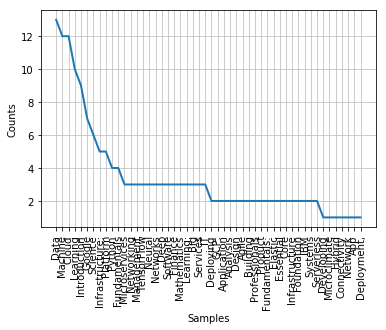

In [87]:
#Get an insight into what types of words are most commonly used.
freq.plot(50, cumulative=False)

# It turns out the top 5 words mostly used are:
- Data
- Machine
- Cloud
- Learning
- Introduction

<h1><center> Data Visualization</center></h1>

# Word Cloud

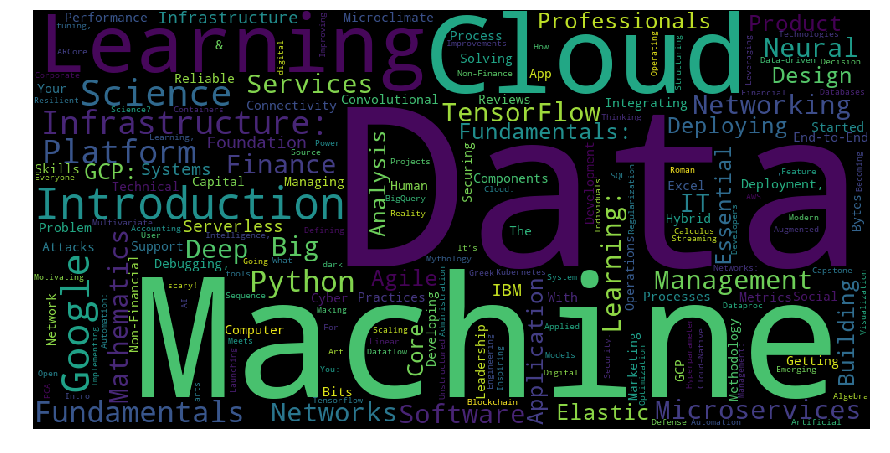

In [89]:
#Create a word cloud to visualize the most commonly use words
word_could_dict=Counter(clean_tokens)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [111]:
init_notebook_mode(connected=True)

# Plotly Graphs

## Scatter Diagram of the total number of courses by institutions

In [112]:
colors = np.random.rand(100)
sz = np.random.rand(100)*30
fig = go.Figure()
fig.add_scatter(x=df3b.index,.
                y=df3b['Course Name'],
                mode='markers',
                marker={'size': sz,
                        'color': colors,
                        'opacity': 0.6,
                        'colorscale': 'Viridis'
                       });
iplot(fig)

## Bar Graph of the total number of courses by institutions

In [113]:
data = [go.Bar(
            x=df3b.index,
            y=df3b['Course Name']
    )]

iplot(data)

## Pie Chart of the total number of courses by institutions


In [114]:
trace = go.Pie(labels=df3b.index, values=df3b['Course Name'])

iplot([trace])

## Scatter Diagram of the total number of courses by data issued.


In [116]:
colors = np.random.rand(100)
sz = np.random.rand(100)*30
fig = go.Figure()
fig.add_scatter(x=df3a.index,
                y=df3a['Course Name'],
                mode='markers',
                marker={'size': sz,
                        'color': colors,
                        'opacity': 0.6,
                        'colorscale': 'Viridis'
                       });
iplot(fig)

## Bar Graph of the total number of courses by institutions


In [124]:
data = [go.Bar(
            x=df3a.index,
            y=df3a['Course Name']
    )]

iplot(data)

## Pie Chart of the total number of courses by institutions


In [125]:
trace = go.Pie(labels=df3a.index, values=df3a['Course Name'])

iplot([trace])

In [141]:
trace0 = go.Table(
  columnorder = [1,2,3],
  columnwidth = [80,40,400],
  header = dict(
    values = [['<b>Course Name</b>'],['<b>Grade</b>'],
                  ['<b>Website</b>']],
    line = dict(color = '#506784'),
    fill = dict(color = '#119DFF'),
    align = ['left','center'],
    font = dict(color = 'white', size = 12),
    height = 40
  ),
  cells = dict(
    values = [df['Course Name'],df['Course Grade'],df['Website']],
    line = dict(color = '#506784'),
    fill = dict(color = ['#25FEFD', 'white']),
    align = ['left', 'center'],
    font = dict(color = '#506784', size = 12),
    height = 30
    ))

data = [trace0]

iplot(data)

In [142]:
df3c = df.groupby(['Course Grade']).count()

In [143]:
df3c

,Course Name,Institution,Issue Date,Credential,Website,Issuing Organization
Course Grade,,,,,,
74,1,1,1,1,1,1
76,1,1,1,1,1,1
78,1,1,1,1,1,1
80,2,2,2,2,2,2
82,4,4,4,4,4,4
83,8,8,8,8,8,8
84,2,2,2,2,2,2
85,3,3,3,3,3,3
86,2,2,2,2,2,2


## Scatter Diagram of the total number of courses by grade received


In [150]:
colors = np.random.rand(100)
sz = np.random.rand(100)*30
fig = go.Figure()
fig.add_scatter(x=df3c.index,
                y=df3c['Course Name'],
                mode='markers',
                marker={'size': sz,
                        'color': colors,
                        'opacity': 0.6,
                        'colorscale': 'Viridis'
                       });
iplot(fig)

## Scatter Diagram of the grade received by the course taken

In [147]:
colors = np.random.rand(100)
sz = np.random.rand(100)*30
fig = go.Figure()
fig.add_scatter(x=df['Course Name'],
                y=df['Course Grade'],
                mode='markers',
                marker={'size': sz,
                        'color': colors,
                        'opacity': 0.6,
                        'colorscale': 'Viridis'
                       });
iplot(fig)

In [152]:
dfc = df.sort_values(by=['Course Grade'], ascending=False)

In [153]:
colors = np.random.rand(100)
sz = np.random.rand(100)*30
fig = go.Figure()
fig.add_scatter(x=dfc['Course Name'],
                y=dfc['Course Grade'],
                mode='markers',
                marker={'size': sz,
                        'color': colors,
                        'opacity': 0.6,
                        'colorscale': 'Viridis'
                       });
iplot(fig)

<h1><center> Insights To the Data</center></h1>

# Statistics

### Courses by Institutions

- Amazon – 1
- Google – 29
- HEC Paris – 1
- IBM – 13
- Imperial College London – 1
- New York University – 1
- PWC – 2
- Rice University – 1
- University of Alberta – 3
- University of California San Diego – 1
- University of California Irvine – 1
- University of Michigan – 1
- University of Pennsylvania – 6
- University of Virginia – 2
- Yonsei University – 1
- Deeplearning.ai – 7


Total number of courses – 73

Google = 39% 

IBM = 17%

UPenn + deeplearning.ai = 17%


### Completed the most courses in September 2018 when I was job searching



### Grades

- Average grade received is **89.767**

- Grades >= 90%  is 38 = **52%**

- Grades >= 80% is 70 = **95%**

- Highest grade **100%** 

- Number of courses with 100% is 4 = **5%**

- Lowest grade **74%**

- Grades <= 70% is **3**

- The 3 lowest grades in the 70s were in App Development on Google Cloud



### Titles

- Titles that contain the word "Data" is 14 = **19%

- Titles that contain the word "Machine Learning" is 12 = **16%

- Titles that contain the either "Data", "Machine Learning", "AI", or "Deep Learning" is 28 = **38%

- Titles that contain the word "Google" is 7 = **9%

- Titles that contain the word "Management" is 4 = **5%

- Titles that contain the word "Cloud" is 13 = **17%


From the statistics, it can be inferred that I have taken a lot of courses in cloud, ML, AI and Data. I need to take more courses in the humanities, personal and professional development if I want to be more well rounded. 